# Part 1 - Exploratory Data Analysis
___


## Importing libraries and loading our data

In [3]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")
from collections import OrderedDict

import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
# loading data 
df = pd.read_json('logins.json')

___

## Exploring our data 

In [6]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


___

## Setting datetime object as index

Here we will create a new column called 'instances' that contains a '1' for each instance of a login.

In [9]:
df['instances'] = np.ones(len(df['login_time']))
df = df.set_index('login_time')
df.head()

,instances
login_time,
1970-01-01 20:13:18,1.0
1970-01-01 20:16:10,1.0
1970-01-01 20:16:37,1.0
1970-01-01 20:16:36,1.0
1970-01-01 20:26:21,1.0


___

## Aggregating instances of logins based on 15 minute intervals

In [11]:
df_15 = df.resample('15 min').sum()
df_15.head()

,instances
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


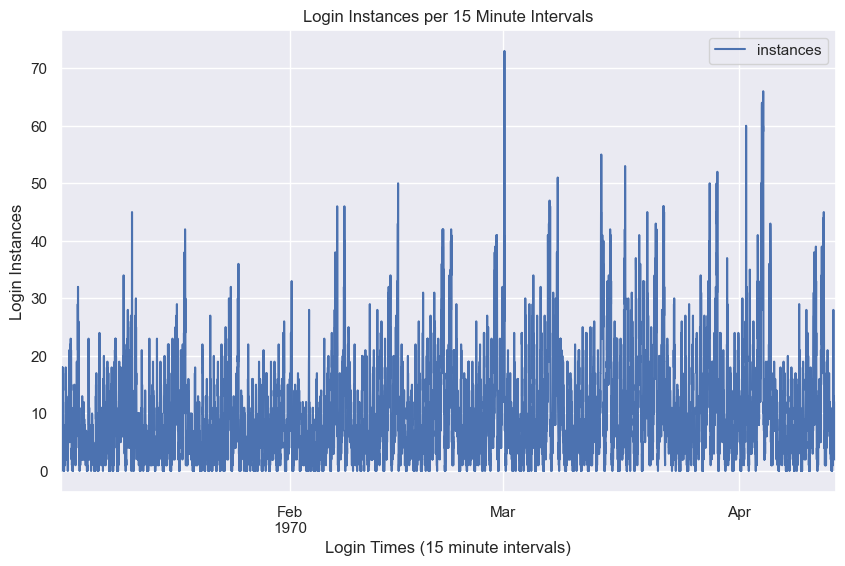

In [12]:
ax = df_15.plot(figsize=(10,6), title = 'Login Instances per 15 Minute Intervals',)
ax.set(xlabel = 'Login Times (15 minute intervals)', ylabel = 'Login Instances');

___

## Exploring daily cycles


### Exploring the first available day, and the last available day: 

It seems that the first day is missing values. It starts at hour 20 and ends at hour 24.

In [15]:
df_15.loc['1970-01-01']

,instances
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


The last day is missing values as well. It ends at hour 18:45.

In [17]:
df_15.tail()

,instances
login_time,
1970-04-13 17:45:00,5.0
1970-04-13 18:00:00,5.0
1970-04-13 18:15:00,2.0
1970-04-13 18:30:00,7.0
1970-04-13 18:45:00,6.0


### Daily cycles

In [19]:
df_15['day'] = df_15.index.day
df_15['month'] = df_15.index.month
df_15['hour'] = df_15.index.hour
df_15.head()

,instances,day,month,hour
login_time,,,,
1970-01-01 20:00:00,2.0,1,1,20
1970-01-01 20:15:00,6.0,1,1,20
1970-01-01 20:30:00,9.0,1,1,20
1970-01-01 20:45:00,7.0,1,1,20
1970-01-01 21:00:00,1.0,1,1,21


C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

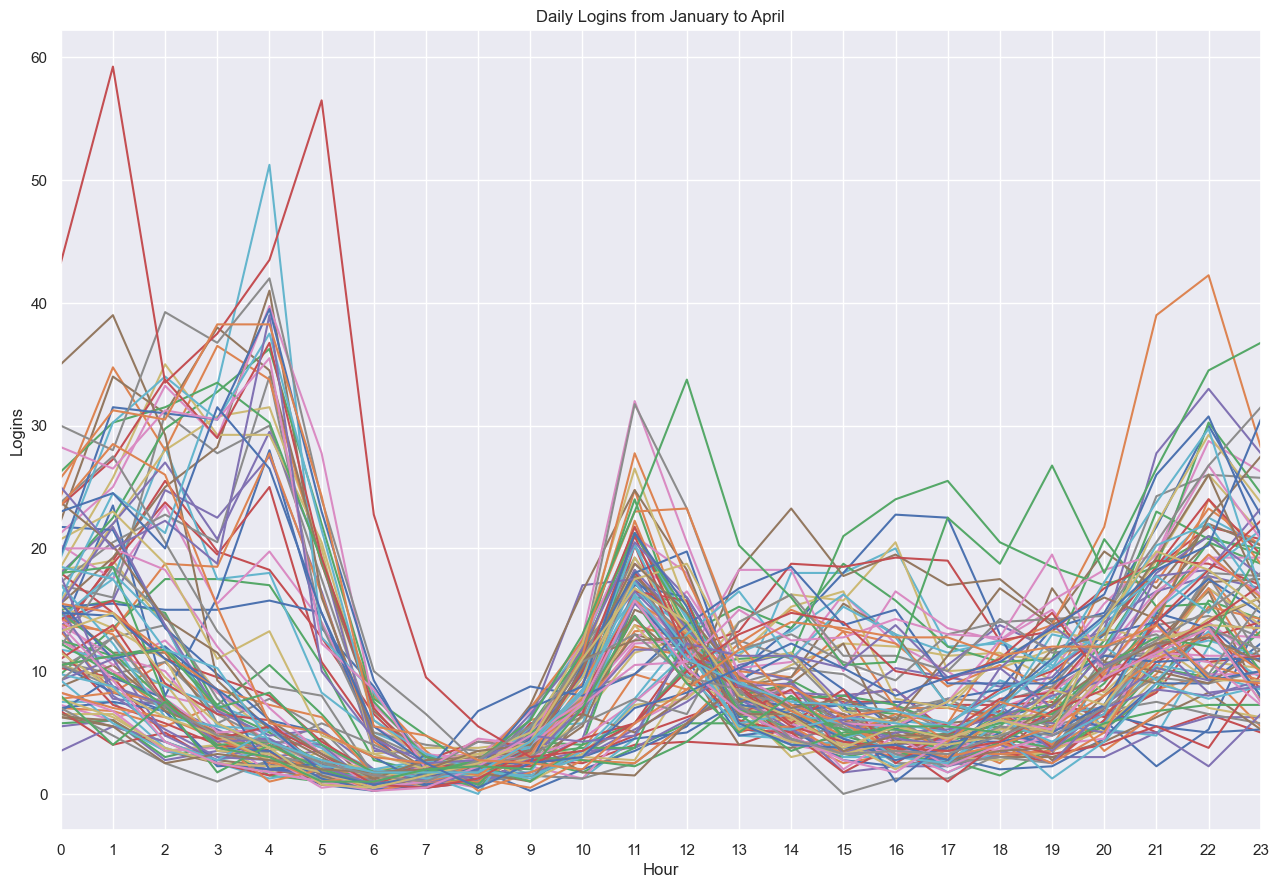

In [20]:
# plotting daily logins between Jan - Apr
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

# title
plt.title('Daily Logins from January to April')

# setting x axis limit and ticks
ax.set_xlim(0,23)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# naming axes
ax.set_xlabel('Hour')
ax.set_ylabel('Logins')

# for loop to plot each day in every month
for m in df_15['month'].unique():
    for d in df_15[df_15['month']==m]['day'].unique():
        sns.lineplot(y = df_15.loc[f'1970-{m}-{d}']['instances'], x = df_15.loc[f'1970-{m}-{d}']['hour'],
                     errorbar = None)



This looks interesting. We can see that there are reoccurring peaks and lows. The hours between 6 and 8 are generally always low in logins. However, we can see a discrepancy between the lows and the highs in logins during the rest of the spans. The most obvious reason is that the discrepancy is due to whether the day is a weekend or not. Let's visualize this using color.

In [22]:
weekend = []
for i in range(len(df_15.index.weekday)):   
    if df_15.index.weekday[i] < 5:
        weekend.append("weekday")
    else:  # 5 Sat, 6 Sun
        weekend.append("weekend")

In [23]:
weekend2 = []
for i in range(len(df_15.index.weekday)):   
    if df_15.index.weekday[i] < 5:
        weekend2.append(False)
    else:  # 5 Sat, 6 Sun
        weekend2.append(True)

In [24]:
df_15['weekend'] = weekend
df_15['weekend2'] = weekend2

In [25]:
df_15.head()

,instances,day,month,hour,weekend,weekend2
login_time,,,,,,
1970-01-01 20:00:00,2.0,1,1,20,weekday,False
1970-01-01 20:15:00,6.0,1,1,20,weekday,False
1970-01-01 20:30:00,9.0,1,1,20,weekday,False
1970-01-01 20:45:00,7.0,1,1,20,weekday,False
1970-01-01 21:00:00,1.0,1,1,21,weekday,False


C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

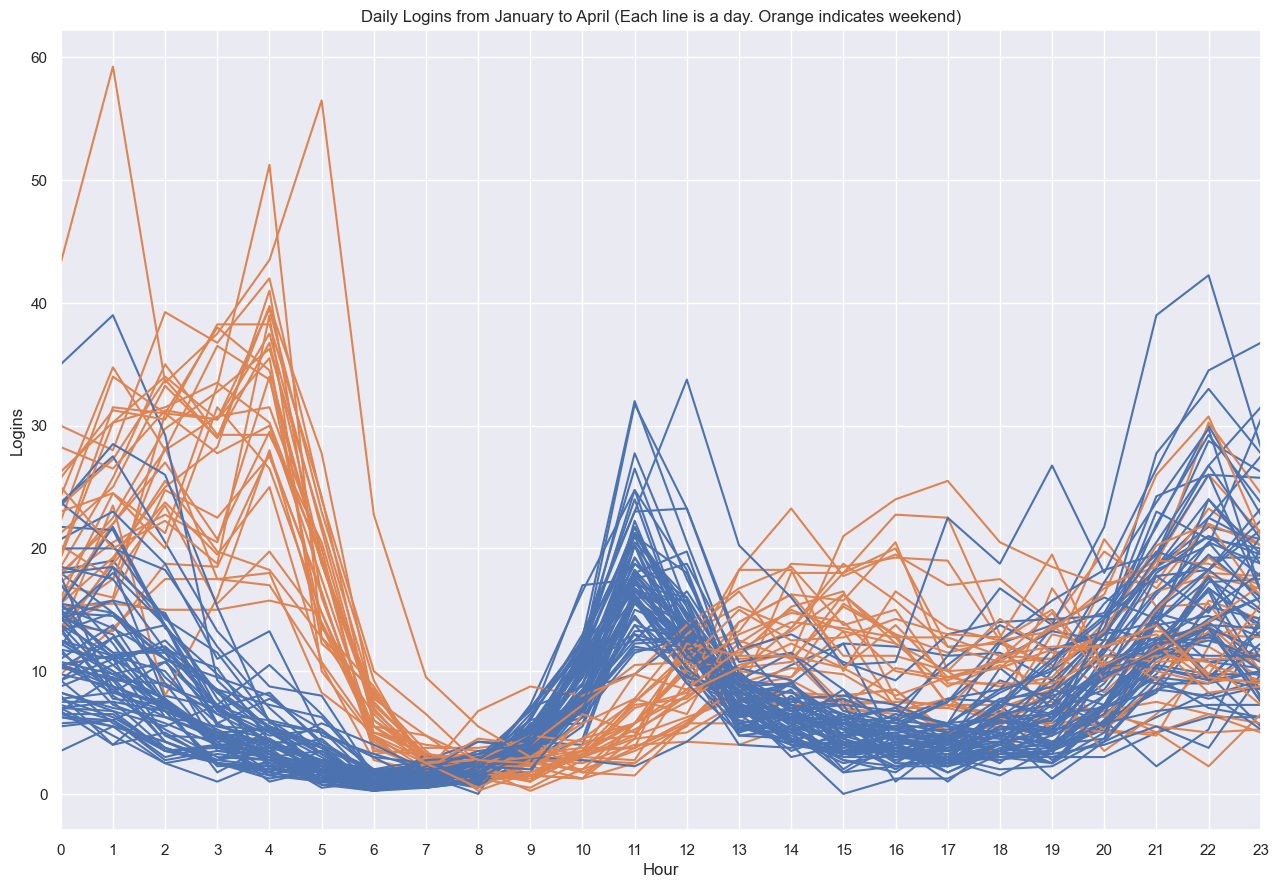

In [26]:
# plotting daily logins between Jan - Apr
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0,0,1,1])

# title
plt.title('Daily Logins from January to April (Each line is a day. Orange indicates weekend)')

# setting x axis limit and ticks
ax.set_xlim(0,23)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

# naming axes
ax.set_xlabel('Hour')
ax.set_ylabel('Logins')

# legend

# for loop to plot each day in every month
for m in df_15['month'].unique():
    for d in df_15[df_15['month']==m]['day'].unique():
        sns.lineplot(y = df_15.loc[f'1970-{m}-{d}']['instances'], x = df_15.loc[f'1970-{m}-{d}']['hour'],
                     errorbar = None, hue=df_15['weekend'], legend = None)


Now the plot is clearer. We can see more uniformity in patterns. It makes sense that during the weekends, there are more logins after midnight and in the afternoons since people usually go out during those times. While during weekdays, logins begin to pick up steam at 8 am, then slow down, and then start to pick up steam again between 5 and 6 pm, which reflects the hours of a typical workday.

In [28]:
df_weekday_hr_avg = df_15[df_15['weekend']=='weekday'].groupby('hour').mean(numeric_only=True)[['instances']]
df_weekend_hr_avg = df_15[df_15['weekend']=='weekend'].groupby('hour').mean(numeric_only=True)[['instances']]

C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ak5du\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

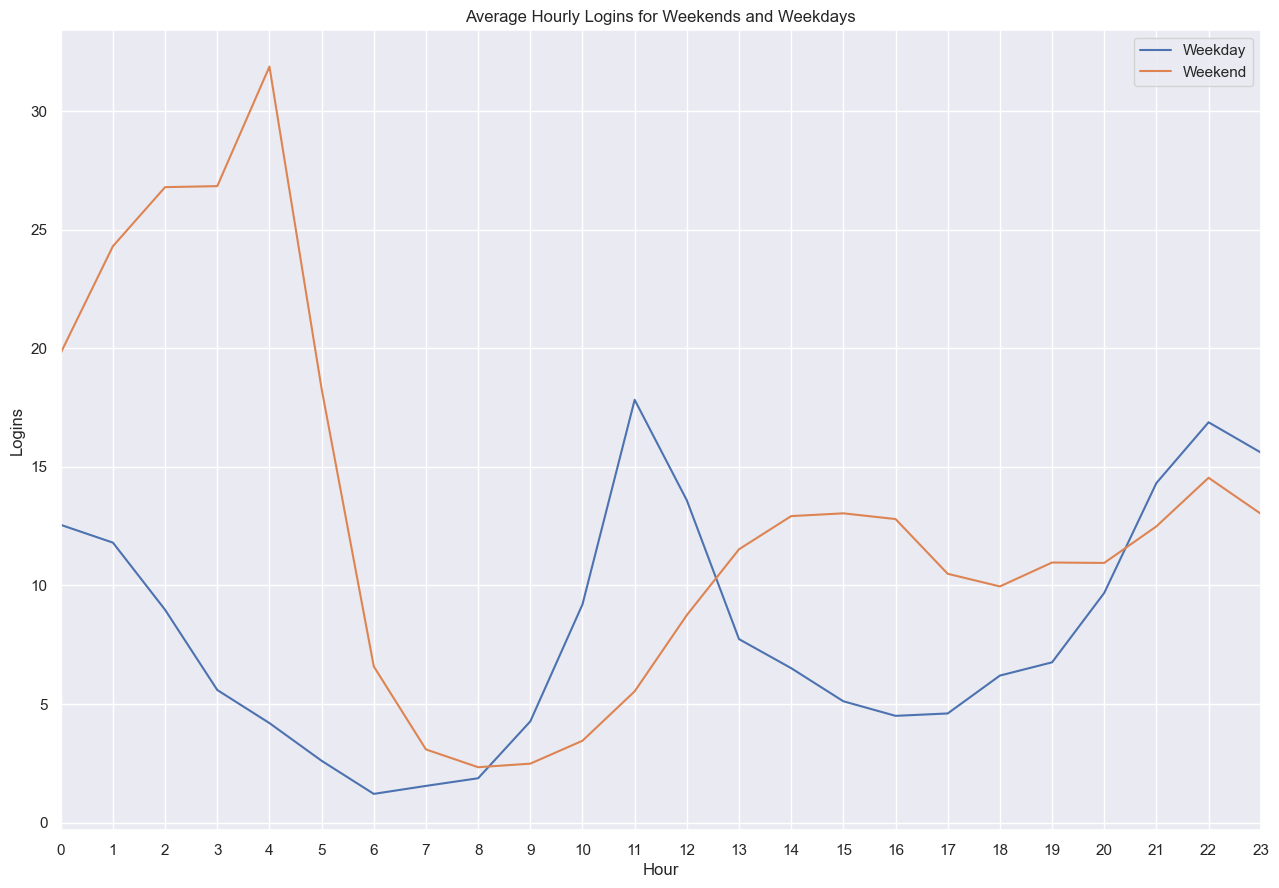

In [29]:
fig = plt.figure(figsize=(12,8))
p = fig.add_axes([0,0,1,1])

p = sns.lineplot(y = df_weekday_hr_avg['instances'], x = df_weekday_hr_avg.index, data = df_weekday_hr_avg,
                label = 'Weekday')
p = sns.lineplot(y = df_weekend_hr_avg['instances'], x = df_weekend_hr_avg.index, data = df_weekday_hr_avg,
                label = 'Weekend')

p.set_title('Average Hourly Logins for Weekends and Weekdays')
p.set_xticks (range(len(df_weekday_hr_avg)))
p.set_xlim([0,23])
p.set_xlabel('Hour')
p.set_ylabel('Logins')

plt.show()

In [30]:
df_weekdays = df_15[df_15['weekend']=='weekday']
df_weekends = df_15[df_15['weekend']=='weekend']

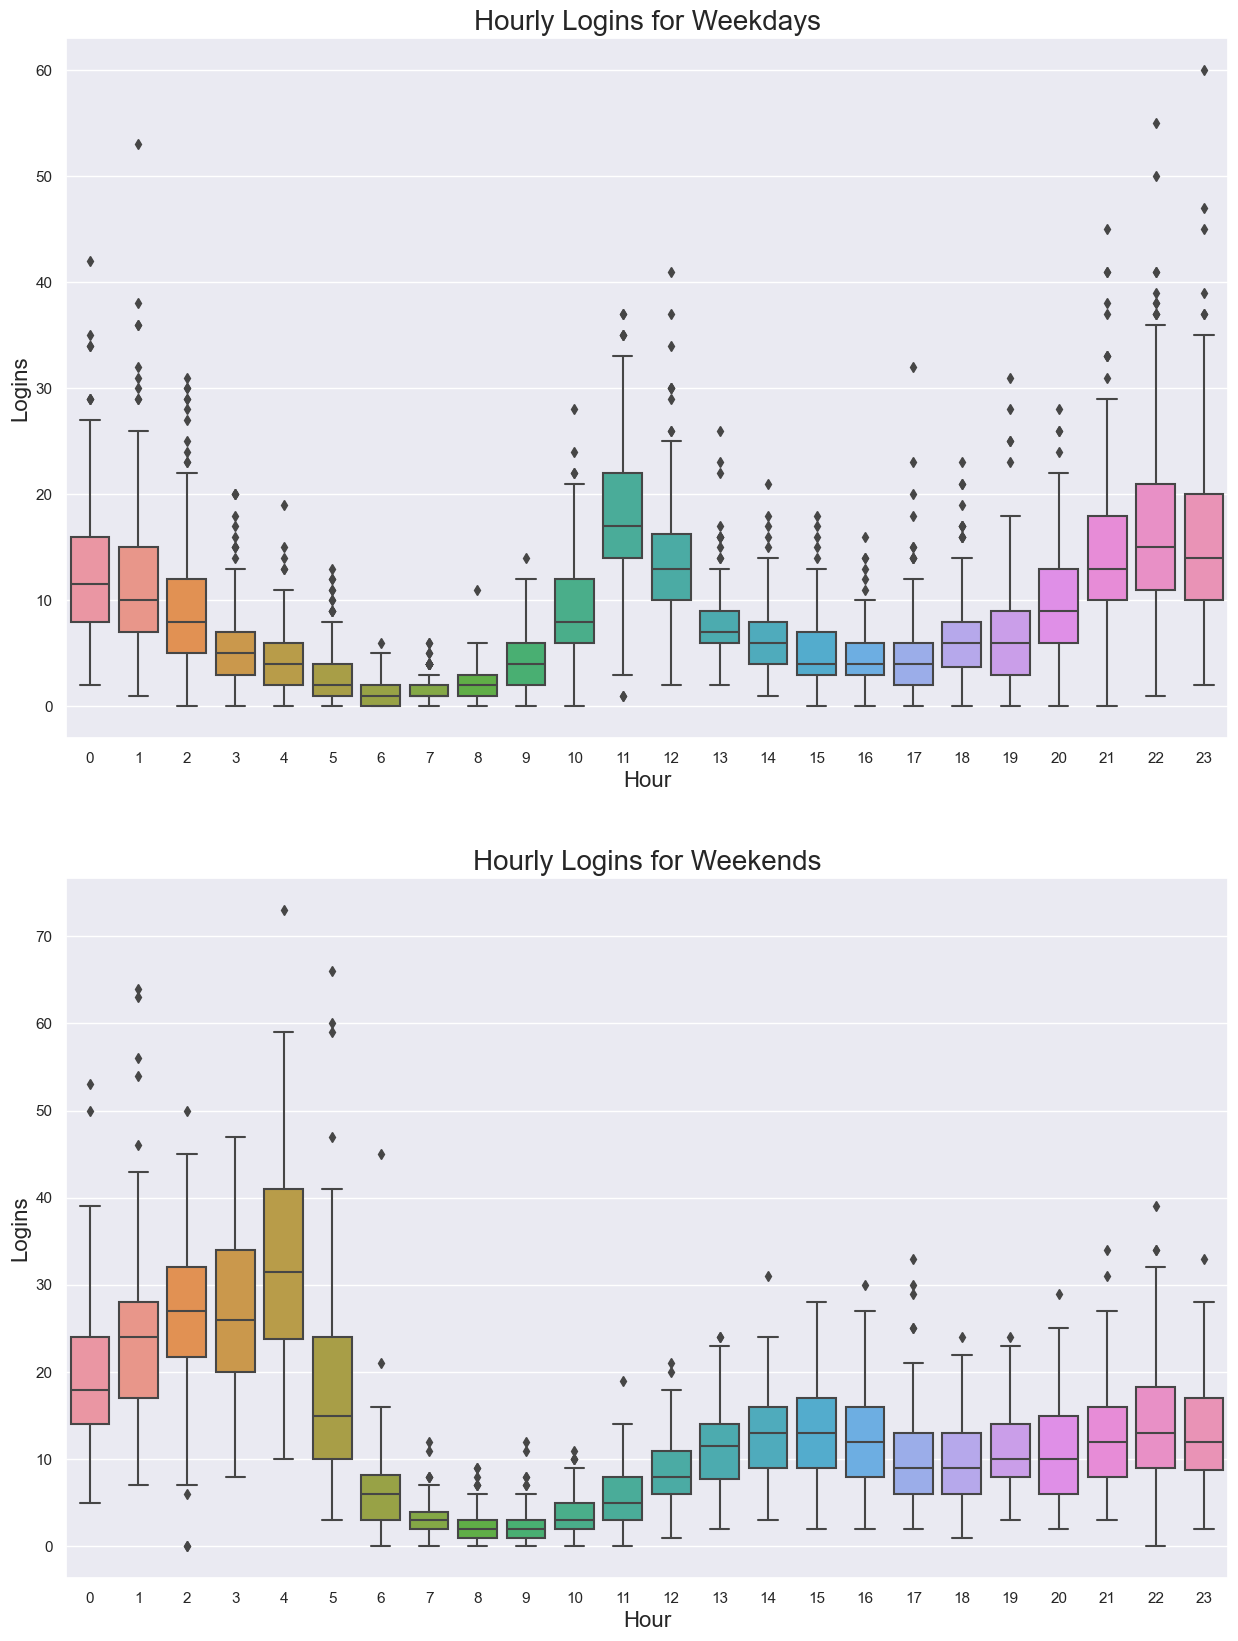

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))

sns.boxplot(x = df_weekdays['hour'], y = 'instances',data = df_weekdays, ax=ax[0])
ax[0].set_title('Hourly Logins for Weekdays', fontsize = 20, loc='center')
ax[0].set_xlabel('Hour', fontsize = 16)
ax[0].set_ylabel('Logins', fontsize = 16)

sns.boxplot(x = df_weekends['hour'], y = 'instances',data = df_weekends, ax=ax[1])
ax[1].set_title('Hourly Logins for Weekends', fontsize = 20, loc='center')
ax[1].set_xlabel('Hour', fontsize = 16)
ax[1].set_ylabel('Logins', fontsize = 16);

___

## Exploring the trend

In [33]:
df_daily = df.resample('D').sum(numeric_only=True)
df_daily.head()

,instances
login_time,
1970-01-01,112.0
1970-01-02,681.0
1970-01-03,793.0
1970-01-04,788.0
1970-01-05,459.0


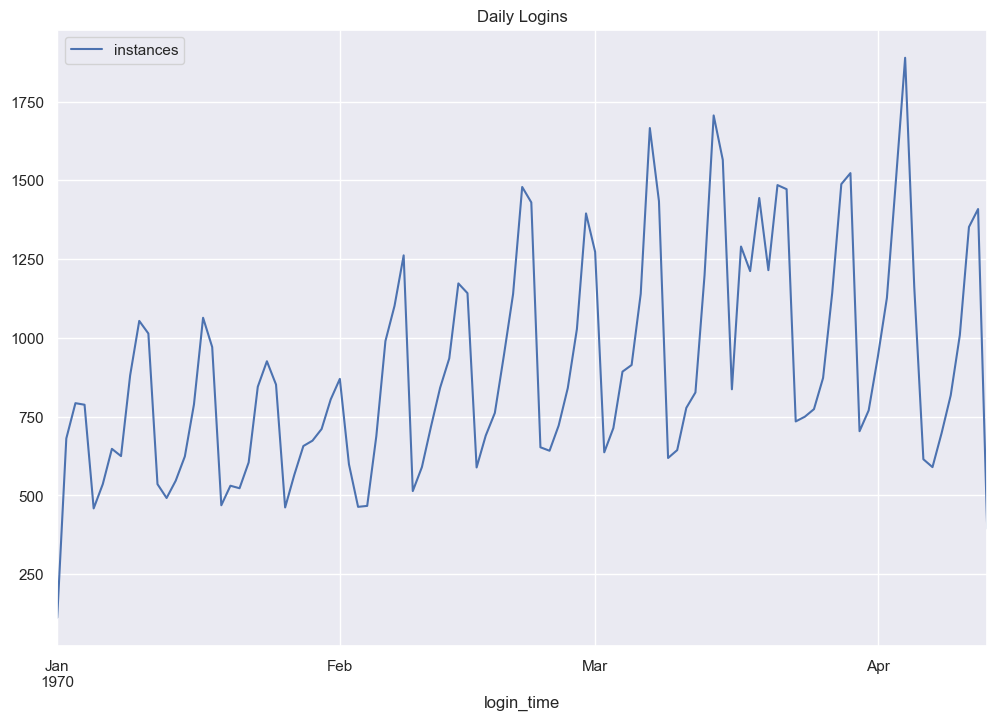

In [34]:
df_daily.plot(figsize = (12,8), title = 'Daily Logins');

We can see that the trend is upwards. It seems like the time series could be multiplicative, but we can't be certain because we only have 4 months worth of data. Also, the available months are between January and April, so the increase in demand might be due to the shift from winter to summer. 

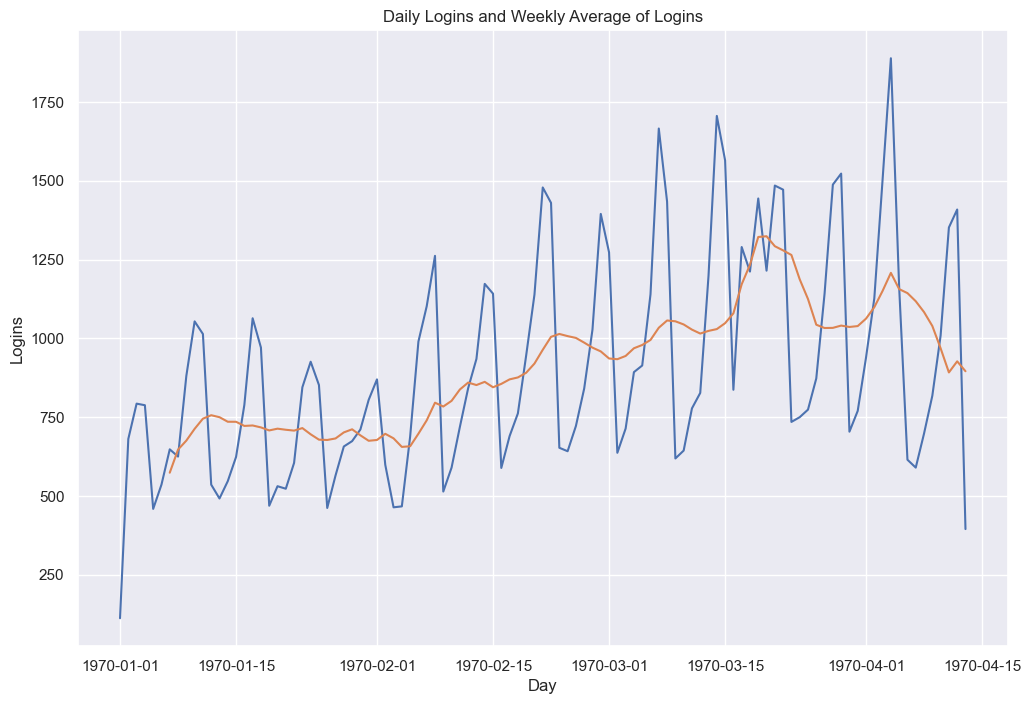

In [36]:
fig = plt.figure(figsize = (12,8))
plt.title('Daily Logins and Weekly Average of Logins')
plt.plot(df_daily)
plt.plot(df_daily.rolling(window = 7).mean())
plt.xlabel('Day')
plt.ylabel('Logins');

### ETS Decomposition

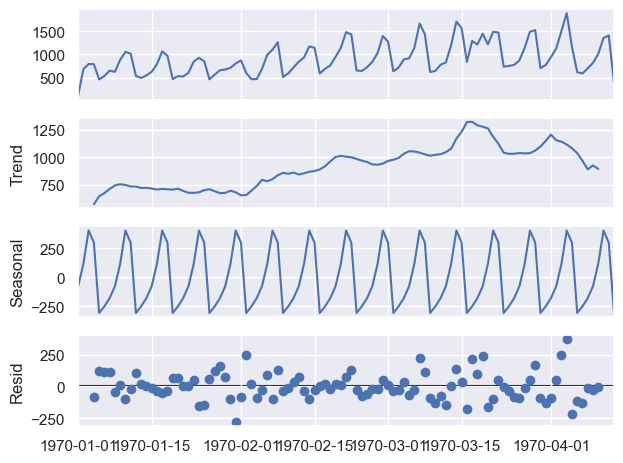

In [38]:
result = seasonal_decompose(df_daily)
result.plot();

___